# Energy Use Data Analysis / Visualization

# Introduction
This project is meant to gather insights on electricity usage. This file will visualize the cleaned data.

## Data
This takes in the file outputted from the "green_button_data_cleaning.ipynb".


## Original Data Source
Data is from my energy company(ComEd) from the past year. 10_22_2022 to 10_22_2023
Data from the [My Green Button](https://secure.comed.com/MyAccount/MyBillUsage/pages/secure/GreenButtonConnectDownloadMyData.aspx) webpage on the ComEd website.

# Column / header info
* **DATE**: Day recorded
* **START_TIME**: start of recording in Hour:Minutes
* **END_TIME**: end of recording in Hour:Minutes
* **USAGE**: Electric usage in kWh
* **COST**: amount charged for energy usage in USD

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
# Import the energy use spreadsheet from the 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
energy_df = pd.read_csv(filepath_or_buffer=file_path)

In [186]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_TIME  17517 non-null  object 
 1   DATE        17517 non-null  object 
 2   END_TIME    17517 non-null  object 
 3   USAGE       17517 non-null  float64
 4   COST        17517 non-null  float64
 5   USAGE_DUR   17517 non-null  object 
dtypes: float64(2), object(4)
memory usage: 821.2+ KB


In [187]:
print(energy_df.columns)
energy_df.head()

Index(['START_TIME', 'DATE', 'END_TIME', 'USAGE', 'COST', 'USAGE_DUR'], dtype='object')


,START_TIME,DATE,END_TIME,USAGE,COST,USAGE_DUR
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01,0 days 00:29:00
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02,0 days 00:29:00
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01,0 days 00:29:00
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02,0 days 00:29:00
4,2022-10-22 02:00:00,2022-10-22 00:00:00,2022-10-22 02:29:00,0.10,0.01,0 days 00:29:00


In [188]:
# convert strings stored in csv to their proper datetime objs
energy_df['START_TIME'] = pd.to_datetime(energy_df['START_TIME'], infer_datetime_format=True)
energy_df['END_TIME'] = pd.to_datetime(energy_df['END_TIME'], infer_datetime_format=True)
energy_df['DATE'] =  pd.to_datetime(energy_df['DATE'], format='%Y-%m-%d')
energy_df.head()

,START_TIME,DATE,END_TIME,USAGE,COST,USAGE_DUR
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01,0 days 00:29:00
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02,0 days 00:29:00
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01,0 days 00:29:00
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02,0 days 00:29:00
4,2022-10-22 02:00:00,2022-10-22,2022-10-22 02:29:00,0.10,0.01,0 days 00:29:00


In [189]:
# get the date range for the data
start_date = energy_df['DATE'].min()
end_date = energy_df['DATE'].max()
print(start_date, ' to ', end_date)

2022-10-22 00:00:00  to  2023-10-21 00:00:00


# Planned Graphs
Energy usage is proportional to monetary cost so, it'll be more intuitive to graph the cost(USD).
Energy usage in summer vs winter were very different
* Time Series Plot with a rolling average by the week
* Graph the total cost of electricity throughout the year
* Split the data by cold/hot days & Graph/compare the Average usage for each hour

In [190]:
# Create new columns for future plots
# Group by 'DATE' and sum 'USAGE' for each date
daily_sum = energy_df.groupby('DATE')['USAGE', 'COST'].sum().reset_index()

# Extract year/month into a new column
daily_sum['YearMonth'] = daily_sum['DATE'].dt.to_period('M')

<ipython-input-190-3497588ecf69>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_sum = energy_df.groupby('DATE')['USAGE', 'COST'].sum().reset_index()


In [191]:
print(daily_sum.columns)

Index(['DATE', 'USAGE', 'COST', 'YearMonth'], dtype='object')


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


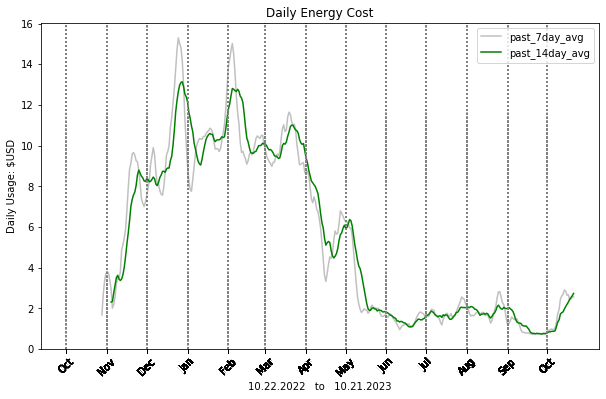

In [192]:
# Graph how USAGE total for every hour changes throughout the year

# Create a Time Series plot
plt.figure(figsize=(10, 6))
# plt.plot(daily_sum['DATE'], daily_sum['USAGE'])
x_axis = start_date.strftime("%m.%d.%Y") + '   to   ' + end_date.strftime("%m.%d.%Y")
plt.xlabel(x_axis)
plt.ylabel('Daily Usage: $USD')
plt.title('Daily Energy Cost')
plt.xticks(daily_sum['YearMonth'].dt.to_timestamp(), daily_sum['YearMonth'].dt.strftime('%b'), rotation=45)


# Smoothed Line Plot (rolling average every week)
smoothed = daily_sum.set_index('DATE').rolling(window=7).mean()  # Adjust window for smoothing
plt.plot(smoothed.index, smoothed['COST'], label='past_7day_avg', color='silver')


# Smoothed Line Plot (rolling average every 2 weeks)
smoothed2 = daily_sum.set_index('DATE').rolling(window=14).mean()  # Adjust window for smoothing
plt.plot(smoothed2.index, smoothed2['COST'], label='past_14day_avg', color='green')


# Plotting vertical lines for each month
for date in daily_sum['YearMonth'].dt.to_timestamp():
    plt.axvline(x=date, color='gray', linestyle=':')

plt.legend()
plt.show()

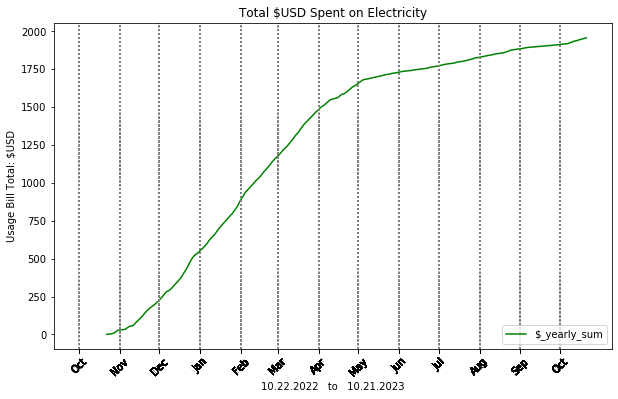

In [193]:
# Graph how the USAGE Bill adds up throughout the whole year
daily_sum['COST_Cumulative'] = daily_sum['COST'].cumsum()

# Create a Time Series plot
plt.figure(figsize=(10, 6))
x_axis = start_date.strftime("%m.%d.%Y") + '   to   ' + end_date.strftime("%m.%d.%Y")
plt.xlabel(x_axis)
plt.ylabel('Usage Bill Total: $USD')
plt.title('Total $USD Spent on Electricity')
plt.xticks(daily_sum['YearMonth'].dt.to_timestamp(), daily_sum['YearMonth'].dt.strftime('%b'), rotation=45)

indexed_daily_sum = daily_sum.set_index('DATE')
plt.plot(indexed_daily_sum.index, indexed_daily_sum['COST_Cumulative'], label='$_yearly_sum', color='green')

# Plotting vertical lines for each month
for date in daily_sum['YearMonth'].dt.to_timestamp():
    plt.axvline(x=date, color='gray', linestyle=':')

plt.legend()
plt.show()

## Energy Usage Analysis
### Different Periods in the Data
There seems to be a few different USAGE patterns data's date range.
* Incline in USAGE in Nov.1st - Nov.15th
* High USAGE months: Nov.15th - Mar.30th
* Decline in USAGE from Apr - May.15th
* Low USAGE months: May.15th - Oct.1st

### Adjusting Visualizations to Reflect this
The rest of the visualizations with this dataset should be done with these periods in mind.

In [194]:
# create 'HOUR' column for hourly USAGE for plotting throughout the day
energy_df['HOUR'] = energy_df['START_TIME'].dt.hour
energy_df.head()

,START_TIME,DATE,END_TIME,USAGE,COST,USAGE_DUR,HOUR
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01,0 days 00:29:00,0
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02,0 days 00:29:00,0
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01,0 days 00:29:00,1
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02,0 days 00:29:00,1
4,2022-10-22 02:00:00,2022-10-22,2022-10-22 02:29:00,0.10,0.01,0 days 00:29:00,2


In [195]:
# Separating the data to help with later visualizations
# Filter data for the High USAGE months (from Nov.15th - Mar.30th)
cold_days = energy_df[((energy_df['DATE'].dt.month == 11) & (energy_df['DATE'].dt.day >= 15)) |
                      (energy_df['DATE'].dt.month == 12) | 
                      (energy_df['DATE'].dt.month < 4) ]

# Filter data for the Low USAGE months (from May.15th - Oct.1st)
warm_days = energy_df[((energy_df['DATE'].dt.month == 5) & (energy_df['DATE'].dt.day >= 15)) |
                       ((energy_df['DATE'].dt.month > 5) & (energy_df['DATE'].dt.month < 10)) ]

['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']


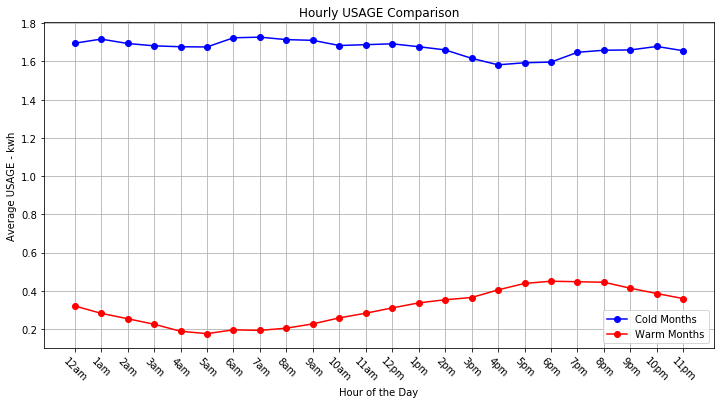

In [196]:
# Group by hour and calculate the mean of 'USAGE'
cold_hour_avgs = cold_days.groupby('HOUR')['USAGE'].mean()
# Group by hour and calculate the mean of 'USAGE'
warm_hour_avgs = warm_days.groupby('HOUR')['USAGE'].mean()

plt.figure(figsize=(12, 6))

# Plot cold_hour_avgs
cold_hour_avgs.plot(kind='line', marker='o', color='b', label='Cold Months')

# Plot hot_hour_avgs on the same plot
warm_hour_avgs.plot(kind='line', marker='o', color='r', label='Warm Months')

plt.title('Hourly USAGE Comparison')
plt.xlabel('Hour of the Day')
plt.ylabel('Average USAGE - kwh')

# formatting the x_axis to am/pm time
def military_to_am_pm(hour):
    if hour > 12:
        return f"{hour - 12}pm"
    elif hour == 12:
        return "12pm"
    elif hour == 0:
        return "12am"
    else:
        return f"{hour}am"

# Convert x-tick labels to AM/PM format
mil_hours = range(24)
day_hrs = [military_to_am_pm(hour) for hour in mil_hours]
print(day_hrs)
plt.xticks(mil_hours, day_hrs, rotation=315)

plt.grid(True)
plt.legend()  # Show legend to distinguish between 'Cold Hours' and 'Hot Hours'

plt.show()

# Hourly Usage Analysis

## Warm Months
It seems our electricity usage directly correlates with the sunlight hours of the day(8am-8pm). This makes sense for 2 reasons:
* We'd use the air conditioner for cooling during those hours.
* Those are the awake hours, so we'd use appliances during those hours.

## Cold Months
* Heating/Cooling USAGE should inversely correlate with sunlight hours.
* Other appliance USAGE still should correlate with sunlight hours.
These 2 USAGE timelines inversely correlate.


## Comparison
Cold months have about 3x the electricity USAGE than warm months. This likely has 2 causes.
* Chicago winters are much worse than the summers.
* Our heaters are MUCH less efficient than our air conditioners.